# Sea Surface Temperature Prediction

In [1]:
# Import All the Necessary Libraries

import pandas as pd
import numpy as np

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Libraries for Model development
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# Import the dataset

data = pd.read_csv('new_output.csv')

In [3]:
# Display the first few rows of the data
print(data.head())

         Time  Latitude  Longitude        SST
0  2013-01-01    10.625     55.125  26.480000
1  2013-01-01    16.625     59.875  25.380000
2  2013-01-01    19.625     69.375  26.640000
3  2013-01-01    16.625     59.625  25.400000
4  2013-01-01    18.875     57.625  25.189999


In [4]:
# Convert Time into "year"
data['year'] = pd.to_datetime(data['Time']).dt.year

# Convert Time into "month"
data['month'] = pd.to_datetime(data['Time']).dt.month

# Convert Time into "day"
data['day'] = pd.to_datetime(data['Time']).dt.day

In [5]:
# Print the modified data

print((data))

              Time  Latitude  Longitude        SST  year  month  day
0       2013-01-01    10.625     55.125  26.480000  2013      1    1
1       2013-01-01    16.625     59.875  25.380000  2013      1    1
2       2013-01-01    19.625     69.375  26.640000  2013      1    1
3       2013-01-01    16.625     59.625  25.400000  2013      1    1
4       2013-01-01    18.875     57.625  25.189999  2013      1    1
...            ...       ...        ...        ...   ...    ...  ...
781795  2023-09-14    19.875     64.375  29.140000  2023      9   14
781796  2023-09-14    10.625     69.375  29.160000  2023      9   14
781797  2023-09-14    18.625     61.625  28.150000  2023      9   14
781798  2023-09-14    12.625     69.875  28.720000  2023      9   14
781799  2023-09-14    22.625     63.125  28.330000  2023      9   14

[781800 rows x 7 columns]


In [6]:
# Scale  ()'Longitude', 'Latitude', 'year', 'month', 'day') of the data

scaler = MinMaxScaler()
data[[ 'Longitude', 'Latitude', 'year', 'month', 'day']] = scaler.fit_transform(data[['Longitude', 'Latitude', 'year', 'month', 'day']])

In [7]:
# Create sequence

def create_sequences(data, target, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = target[i + sequence_length]
        X.append(seq)
        y.append(label)
    return np.array(X), np.array(y)

# Give the sequence length according to the mode of prediction

sequence_length = 10 # adjust based on your model's requirements
features = ['Longitude', 'Latitude', 'year', 'month', 'day']
X, y = create_sequences(data[features].values, data['SST'].values, sequence_length)

In [8]:
# Reshape the X file.

X= X.reshape((X.shape[0], X.shape[1], len(features)))

In [9]:
# Convert X and Y into test and train data respectively.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential()
# LSTM layer
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
# Dense layer for regression
model.add(Dense(units=1, activation='linear'))  # 'linear' activation for regression

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Fit the model with the training set

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
19545/19545 [==============================] - 185s 9ms/step - loss: 5.8633
Epoch 2/50
19545/19545 [==============================] - 186s 9ms/step - loss: 1.7908
Epoch 3/50
19545/19545 [==============================] - 176s 9ms/step - loss: 1.7703
Epoch 4/50
19545/19545 [==============================] - 180s 9ms/step - loss: 1.7462
Epoch 5/50
19545/19545 [==============================] - 181s 9ms/step - loss: 1.7114
Epoch 6/50
19545/19545 [==============================] - 181s 9ms/step - loss: 1.6844
Epoch 7/50
19545/19545 [==============================] - 184s 9ms/step - loss: 1.6700
Epoch 8/50
19545/19545 [==============================] - 184s 9ms/step - loss: 1.6603
Epoch 9/50
19545/19545 [==============================] - 182s 9ms/step - loss: 1.6528
Epoch 10/50
19545/19545 [==============================] - 179s 9ms/step - loss: 1.6486
Epoch 11/50
19545/19545 [==============================] - 182s 9ms/step - loss: 1.6448
Epoch 12/50
19545/19545 [================

In [27]:
# Predict the Model

predicted_sst = model.predict(X_test)

4887/4887 [==============================] - 13s 3ms/step


In [28]:
# Import the Library for finding Mean squared error

from sklearn.metrics import mean_squared_error

y_true = y_test# Actual labels from the test set
y_pred = predicted_sst # Predicted labels from the model


# Find the Mean squared error

mse = mean_squared_error(y_true, predicted_sst)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.629191140782056


In [29]:
# Check the places where the prediction deviates much from true value.

no_of_test=2444
count=0
non_count=0
for i in range(no_of_test):
    if (predicted_sst[i][0]-y_test[i])**2<=5**2:
        count=count+1
        
    else:
        non_count=non_count+1
        
print(count)
print(non_count)



2431
13


In [30]:
print(predicted_sst[i][0], y_test[i])

29.84743 30.15


In [31]:
X_test

array([[[0.15189873, 0.27118644, 0.7       , 0.36363636, 0.03333333],
        [0.60759494, 0.88135593, 0.7       , 0.36363636, 0.03333333],
        [0.98734177, 0.13559322, 0.7       , 0.36363636, 0.03333333],
        ...,
        [0.12658228, 0.13559322, 0.7       , 0.36363636, 0.03333333],
        [0.02531646, 0.30508475, 0.7       , 0.36363636, 0.03333333],
        [0.98734177, 0.62711864, 0.7       , 0.36363636, 0.03333333]],

       [[0.06329114, 0.23728814, 0.7       , 0.63636364, 0.9       ],
        [0.51898734, 1.        , 0.7       , 0.63636364, 0.9       ],
        [0.70886076, 0.72881356, 0.7       , 0.63636364, 0.9       ],
        ...,
        [0.67088608, 0.62711864, 0.7       , 0.63636364, 0.9       ],
        [0.29113924, 0.52542373, 0.7       , 0.63636364, 0.9       ],
        [0.43037975, 0.42372881, 0.7       , 0.63636364, 0.9       ]],

       [[0.63291139, 0.3559322 , 0.3       , 0.63636364, 0.1       ],
        [0.72151899, 0.50847458, 0.3       , 0.63636364, 0.1

In [32]:
for i in range(len(y_test)):
    print(y_test[i], predicted_sst[i])


30.189999 [30.005579]
26.99 [27.147844]
23.68 [26.877077]
28.65 [27.625551]
25.72 [25.46038]
25.849998 [26.077936]
26.47 [26.840702]
24.529999 [25.30739]
26.769999 [26.947227]
26.5 [26.285183]
27.619999 [27.458569]
27.439999 [28.075882]
29.15 [28.124992]
24.529999 [25.605528]
28.16 [29.488462]
28.279999 [27.779257]
28.23 [29.076094]
29.429998 [30.19167]
30.26 [30.44256]
29.31 [28.467863]
25.92 [25.943222]
28.369999 [27.50387]
28.4 [28.294067]
26.019999 [24.958769]
27.949999 [26.665737]
25.14 [27.002382]
19.21 [24.795435]
30.529999 [30.30423]
28.5 [28.47226]
27.65 [27.431973]
25.74 [25.606808]
26.619999 [26.365751]
27.34 [26.70686]
27.71 [27.31731]
26.92 [27.395802]
29.859999 [29.810038]
28.98 [28.964844]
27.92 [28.11089]
30.4 [29.083141]
25.88 [26.553968]
27.59 [25.160433]
30.49 [29.931229]
29.619999 [28.34867]
27.24 [27.858091]
24.689999 [25.75153]
31.06 [28.978884]
28.82 [28.504179]
27.4 [27.925596]
28.099998 [27.078968]
26.56 [27.229465]
28.91 [28.77346]
25.64 [27.855373]
28.289999 

In [33]:
print(predicted_sst)

[[30.005579]
 [27.147844]
 [26.877077]
 ...
 [28.615385]
 [28.61491 ]
 [27.352804]]


In [34]:
print(predicted_sst[1][0])

27.147844


In [35]:
print(y_test)

[30.189999 26.99     23.68     ... 29.25     29.17     27.68    ]


In [36]:
print(y_test[1])

26.99


In [37]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicted_sst)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.629191140782056


In [38]:
single_condition = pd.DataFrame({'Longitude': 54, 'Latitude':12 , 'year':2015, 'month':6 ,'day':5}, index=[0])

In [39]:
single_condition [[ 'Longitude', 'Latitude', 'year', 'month', 'day']] = scaler.fit_transform(single_condition [[ 'Longitude', 'Latitude', 'year', 'month', 'day']])

In [40]:
sequence_length = 10
input_sequence = np.repeat(single_condition.to_numpy(), sequence_length, axis=0)
input_sequence = input_sequence.reshape((1, sequence_length, 5))

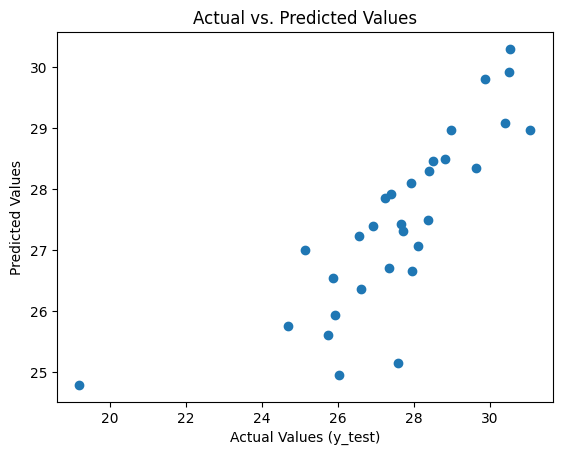

In [41]:
import matplotlib.pyplot as plt


plt.scatter(y_test[20:50], y_pred[20:50])
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
